# Logistic Regression

*Credits: Socorro Dominguez*


In today's lecture we will be looking at a Logistic Regression. Logistic regression is a classification algorithm that is used to predict a binary outcome based on a set of independent variables. 

**Agenda:**

* "Express" Review of Linear Regression

* Limitations of Linear Regression

* Logistic regression

* Multinomial Logistic Regression
    

In [ ]:
! pip install git+https://github.com/mgelbart/plot-classifier

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from plot_classifier import plot_classifier
import matplotlib.pyplot as plt
%matplotlib inline

## Fast Review of Linear Regression

Let's imagine we have a dataset of Height and Weight. Let Height be our feature and Weight our Target Variable.

In [ ]:
df = pd.read_csv('weight-height.csv', usecols = ['Height', 'Weight'])
df.head(10)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971110
8,67.018950,175.929440
9,63.456494,156.399676


In [ ]:
#Calling Linear Regression Model
rm = Ridge()

X_train = df['Height'].values.reshape(-1, 1)
y_train = df['Weight']

In [ ]:
rm.fit(X_train, y_train)

Ridge()

In [ ]:
rm.predict(X_train)[:5]

array([219.16108997, 180.07242032, 221.19140492, 202.83112165,
       188.56054448])

In [ ]:
rm.score(X_train, y_train)

0.8551742120219649

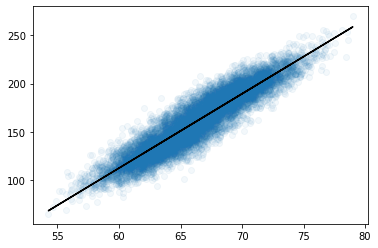

In [ ]:
plt.scatter(X_train, y_train, alpha=0.05)
plt.plot(X_train, (rm.coef_ * X_train) + rm.intercept_, c='black')

So? How were we able to plot?

In [ ]:
ridge_coeffs = rm.coef_
ridge_coeffs

array([7.7172355])

In [ ]:
ridge_intercept = rm.intercept_
ridge_intercept

-350.73373164219254

### Prediction By Hand

In [ ]:
y_train[0:1]

0    241.893563
Name: Weight, dtype: float64

In [ ]:
rm.predict(X_train[0:1])

array([219.16108997])

In [ ]:
(ridge_coeffs * X_train[0:1]) + rm.intercept_

array([[219.16108997]])

In the case of Linear Regression, our intercept and coefficient were chosen by minimizing the MSE of our function. 

### Limitations for Linear Regression

In Regression, we allow the response to take on any real number. But what about:
 - spam/not-spam
 - disease/no disease
 - defect/no defect
 - face / no face

### Classification and Regression Problems (Quick Review)

![img](https://static.javatpoint.com/tutorial/machine-learning/images/regression-vs-classification-in-machine-learning.png)

### Logistic Regression

The first thing to say is that logistic regression is not a regression, but a classification learning algorithm. The name comes from statistics and is due to the fact that the mathematical formulation of logistic regression is similar to that of linear regression.

- A linear model for classification. 
- It learns weights associated with each feature and the bias. 
- The decision boundary is a hyperplane dividing the feature space in "half". That's why we call it a linear classifier.

### Basic Idea

$$
    z = w_1x_1 + w_2x_2 + \ldots + w_nx_n + b \;\; \rightarrow \;\; \hat{y} = \frac{1}{1 + e^{-z}} \;\;\rightarrow \;\; \rm{apply \, threshold} \rightarrow \;\; \rm{prediction}
$$

## Let's Create a Logistic Regression model from the ground up!

We'll use sepal length as an input to classify if a flower species is a virginica or not.

In [ ]:
#Import Dependencies
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load Data
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['species'] = data['target']
df['species'] = df['species'].map({
    0 : 'setosa',
    1 : 'versicolor',
    2 : 'virginica'   
})
df['target'] = df['species'].map({
    'setosa': 0,
    'versicolor':0,
    'virginica':1   
})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


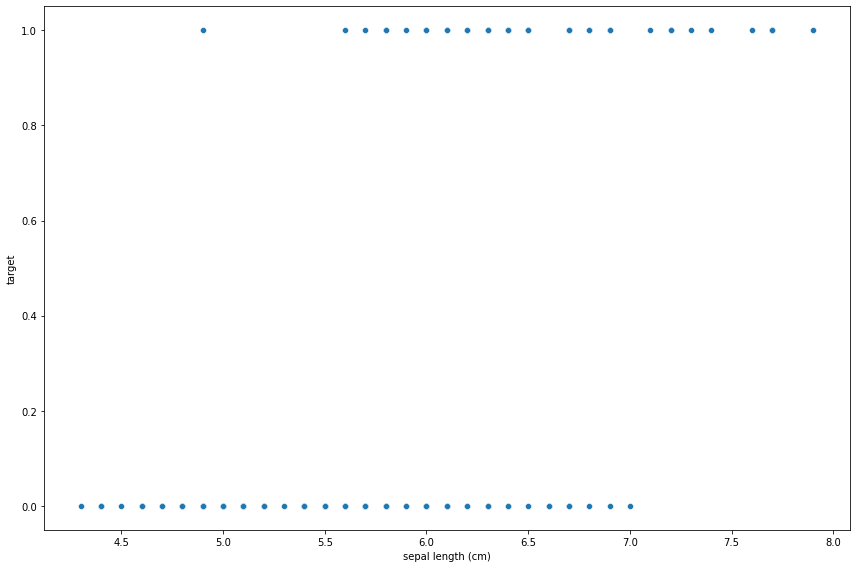

In [ ]:
#Plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=df['sepal length (cm)'], y=df['target'], data=df, ax=ax)

fig.tight_layout()

###It's pretty hard to draw a Regression Line Here!

In the case of our linear regression, because weight was unconstrained to take any value, it was easy to draw a line of best fit through it. In the case of a binary classification (it is or it isn't) we don't have that luxury. 
Instead, of drawing a line to y directly, we convert our y axis into something called the **log(odds)**.


The log odds is defined as: $$ln(\frac{p}{1-p})$$

Where p is the probability that an observation belongs to a certain class. 1 being absolutely sure the observation belongs to that class and 0 being impossible for the observation to belong to the class.

The good thing about using log odds is that it is unbounded and goes from negative inf to positive inf. So now we have the basis for our new linear model:

$$ln(\frac{p}{1-p}) = w_0 + w_1x$$

where x is our input (in this case sepal length) and $w_0$ and $w_1$ are our intercept and coefficient weight.

If we solve for p, we get:
$$p = \frac{e^{w_0 + w_1x}}{1+e^{w_0 + w_1x}}$$
or
$$p = \frac{1}{1+e^{-(w_0 + w_1x)}}$$

which we can use to fit our above graph!

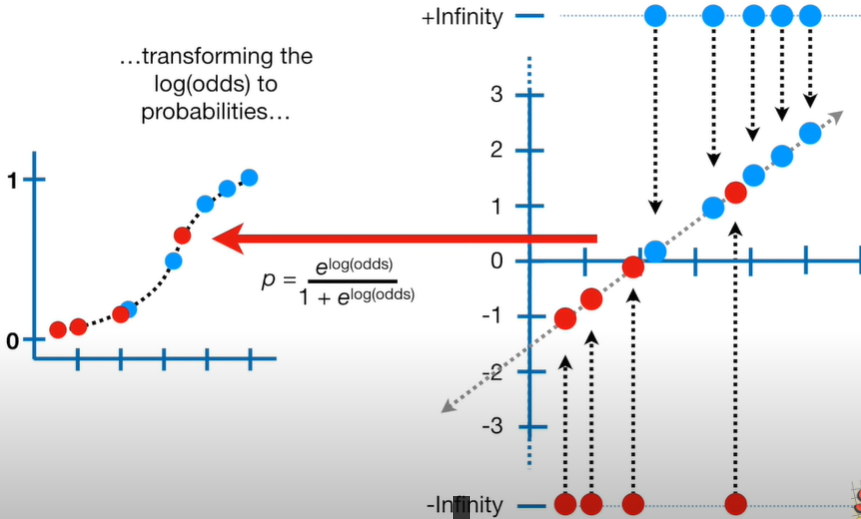

This type of curve is known as the **Sigmoid Curve** and is denoted by $\sigma$(x).

Now that we have a function, our next problem is finding hyperparameters $w_0$ and $w_1$ for our model so that it can best fit our data.

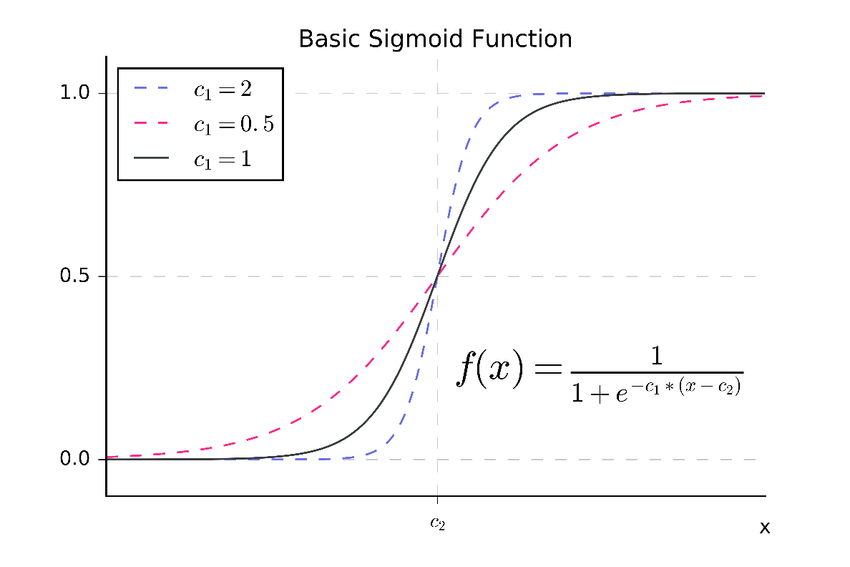

Next we have to include our loss function. Before with Linear Regression, we used Ordinary Least Squares and reduced the Square Error of our model to a minimum in order to find values for our coefficients. With this classification algorithm, we use a different function called the **Binary Cross Entropy** in order to help us select values of w for which our cross entropy achieves a minimum. Keeping in mind that this model will tell us whether a flower will be a virginica or not, our output variables in Y will be either 1 (Virginica) or a 0 (Not a Virginica).

$$ Loss = -\frac{1}{N}\sum_{i=0}^{N} y_i*ln(\hat{y_i}) + (1-y_i)*ln(1 - \hat{y_i})$$

where:

$$\hat{y_i} = \frac{1}{1+e^{-(w_0 + w_1x_i)}} $$

Now, that we have our cost function defined, we use a technique called **gradient descent** where we update and find values of w, in order to get the derivative of our cost function and minimize our error.



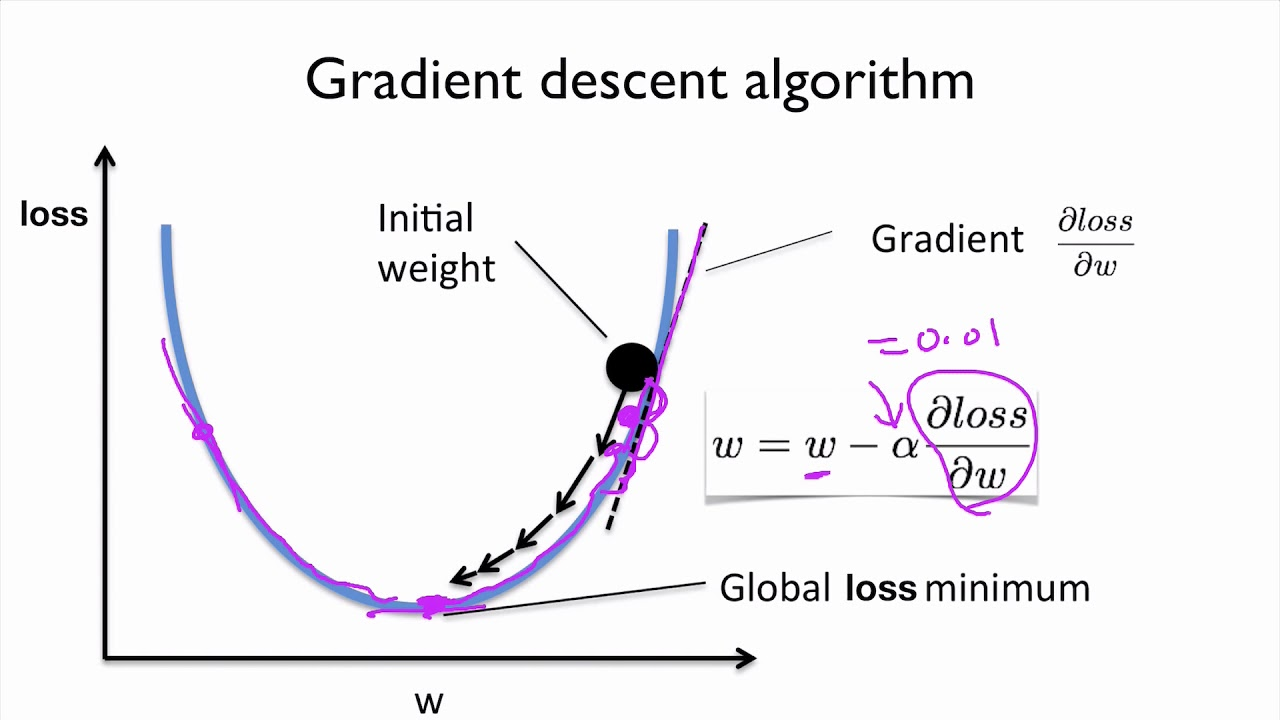

If this scares you, don't worry too much for now. You'll be seeing more of this during the section on neural nets. Let's implement code

In [ ]:
#Programming Exercise - Create sigmoid Function:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
X = np.array(df['sepal length (cm)'])
print (X.shape)

(150,)


In [ ]:
#Prepping Data
X = np.array(df['sepal length (cm)'])
a = np.array([1 for x in range(len(X))])

X = np.row_stack([X,a]).T
Y= np.array(df['target'])

In [ ]:
#Gradient Descent
def model(X, Y, learning_rate, iterations):
  m = X.shape[1]
  n = X.shape[0]

  W = np.zeros((n,1))
  B = 0

  cost_list = []

  for i in range(iterations):

    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)

    # cost function
    cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))

    # Gradient Descent
    dW = (1/m)*np.dot(A-Y, X.T)
    dB = (1/m)*np.sum(A - Y)

    W = W - learning_rate*dW.T
    B = B - learning_rate*dB

    # Keeping track of our cost function value
    cost_list.append(cost)

    if(i%(iterations/10) == 0):
      print("cost after ", i, "iteration is : ", cost)

  return W, B, cost_list

In [ ]:
iterations = 100000
learning_rate = 0.0015
W, B, cost_list = model(X_train, Y_train, learning_rate = learning_rate, iterations=iterations)

cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.6234992476828347
cost after  20000 iteration is :  0.5916294427329307
cost after  30000 iteration is :  0.5663871545017356
cost after  40000 iteration is :  0.5462133110579396
cost after  50000 iteration is :  0.5299238779584843
cost after  60000 iteration is :  0.5166314873599032
cost after  70000 iteration is :  0.5056729100887488
cost after  80000 iteration is :  0.4965506183530302
cost after  90000 iteration is :  0.48888863671802074


Let's create a graph to see our cost function going down after each iteration:

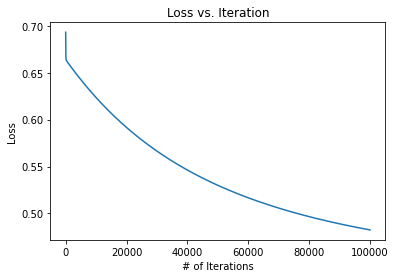

In [ ]:
plt.plot(np.arange(iterations), cost_list)
plt.title('Loss vs. Iteration')
plt.xlabel("# of Iterations")
plt.ylabel('Loss')
plt.show()

So to summarize, we can predict the probability of an observation belonging to a certain class by using the sigmoid function. 

$$\hat{y} = \frac{1}{1+e^{-(w_0 + w_1x)}} $$

The example using the iris dataset only used 1 predictor, but we can fit multiple predictors as well as:


$$\hat{y} = \frac{1}{1+e^{-(w_0 + w_1x_1 + w_2x_2+....+w_nx_n)}} $$


The weights will then be updated via gradient decsent to make our loss as small as possible. If the probability is above a certain cutoff value, we classify the point as belonging to the class. Let's look at another way of looking at logistic regression as drawing a descision boundary between points.

### Explanation of Logistic Regression using USA and Canada Lat Long data


In [ ]:
cities_df = pd.read_csv("canada_usa_cities.csv")

train_df, test_df = train_test_split(cities_df, test_size=0.2, random_state=123)

X_train, y_train = train_df.drop(columns=["country"], axis=1), train_df["country"]
X_test, y_test = test_df.drop(columns=["country"], axis=1), test_df["country"]

In [ ]:
X_train.head()

,longitude,latitude
160,-76.4813,44.2307
127,-81.2496,42.9837
169,-66.0580,45.2788
188,-73.2533,45.3057
187,-67.9245,47.1652


In [ ]:
y_train.head()

160    Canada
127    Canada
169    Canada
188    Canada
187    Canada
Name: country, dtype: object

In [ ]:
lr = LogisticRegression()

lr.fit(X_train.values, y_train)

LogisticRegression()

### Decision boundary of logistic regression

The decision boundary is a hyperplane dividing the feature space in half.

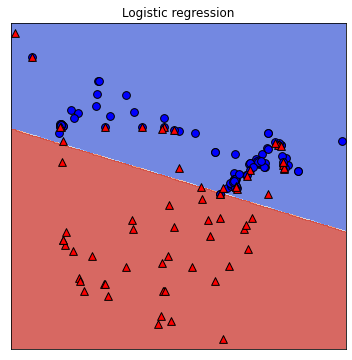

In [ ]:
plt.figure(figsize=(6, 6))
plot_classifier(X_train, y_train, lr, ax=plt.gca())
plt.title("Logistic regression");

### Accessing learned weights

- Recall that logistic regression learns the weights $w$ and bias or intercept $b$

\begin{equation}
\begin{split}
z =& w_1x_1 + \dots w_nx_n + b\\
=& w^TX + b
\end{split}
\end{equation}

- How to access these weights? 
    - In `sklearn`, the `coef_` attribute of the `LogisticRegression` object gives the weights of the features.

In [ ]:
X_train.columns

Index(['longitude', 'latitude'], dtype='object')

In [ ]:
print("Model weights: %s"%(lr.coef_)) # these are weights
print("Model intercept: %s"%(lr.intercept_)) # this is the bias term

data = {'features': X_train.columns, 'coefficients':lr.coef_[0]}
pd.DataFrame(data)

Model weights: [[-0.04108149 -0.33683126]]
Model intercept: [10.8869838]


,features,coefficients
0,longitude,-0.041081
1,latitude,-0.336831


- Both negative weights 
- The weight of latitude is larger in absolute magnitude. 

### Prediction with learned weights

In [ ]:
example = X_test.iloc[0,:]
example.tolist()

[-64.8001, 46.098]

In [ ]:
lr.intercept_

array([10.8869838])

Calculate: ```z = np.dot(w, x) + b```

In [ ]:
np.dot(example.tolist(), lr.coef_.flatten()) + (lr.intercept_)

array([-1.97817876])

In [ ]:
lr.classes_

array(['Canada', 'USA'], dtype=object)

- Our threshold here is 0
- The sign is negative and so predict class -1 (Canada in our case). 

In [ ]:
lr.predict([example])

array(['Canada'], dtype=object)

### Scores to probabilities 

- The numbers we saw above are "raw model output", that is, $z$.
- For linear regression this would have been the prediction.
- For logistic regression, you check the **sign** of this value.
  - If positive, predict $+1$; if negative, predict $-1$.
  - These are "hard predictions".
- You can also have "soft predictions", aka predicted probabilities, that is, $\hat{y}$. 
  - To convert the raw model output into probabilities, instead of taking the sign, we apply the sigmoid.

#### The sigmoid function 
- The sigmoid function "squashes" the raw model output from any number to the range $[0,1]$.
$$\hat{y} = \frac{1}{1+e^{-z}}$$ 
- $\hat{y}$ is the output of the logistic regression model for a particular example.
- Then we can interpret the output as probabilities.
- Recall our hard predictions that check the sign of $z$, or, in other words, whether or not it is $> 0$.
  - The threshold $z=0$ corresponds to $p=0.5$. 
  - In other words, if our predicted probability is above $0.5$ then our hard prediction is $+1$.
 


**Do not lose sleep over this but check it out** 
- Note that $z$ here is also referred to as the log-odds because the inverse of the sigmoid states that $z$ can be defined as the log of the probability of the "1" label (e.g., "USA") divided by the probability of the "0" label (e.g., "Canada").

$$
z = \text{log}\left(\frac{\hat{y}}{1-\hat{y}}\right)
$$ 

- We can say that the Sigmoid Function is a special case of the Softmax function when we only have two classes. More on that in Deep Learning

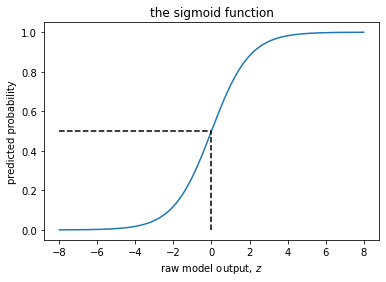

In [ ]:
sigmoid = lambda z: 1/(1+np.exp(-z))

raw_model_output = np.linspace(-8, 8,1000)
 

plt.plot(raw_model_output, sigmoid(raw_model_output));
plt.plot([0,0],[0,0.5], '--k')
plt.plot([-8,0],[0.5,0.5], '--k')

plt.xlabel("raw model output, $z$")
plt.ylabel("predicted probability")
plt.title("the sigmoid function");

### Predicting probabilities 

- You can get the probabilities (confidence) of the classifier's prediction using the `model.predict_proba` method. 

In [ ]:
lr.predict_proba([example])

array([[0.87848688, 0.12151312]])

Let's examine whether we get the same answer if we call sigmoid on $w^Tx + b$

In [ ]:
np.dot(example.tolist(), lr.coef_.flatten()) + (lr.intercept_)

array([-1.97817876])

In [ ]:
sigmoid(np.dot(example.tolist(), lr.coef_.flatten()) + (lr.intercept_))

array([0.12151312])

We got the same score!

In [ ]:
# Predicting probabilities
data_dict = {"y":y_train[:10], 
             "predicted y": lr.predict(X_train[:10].values).tolist(),
             "probabilities": lr.predict_proba(X_train[:10].values).tolist()}

pd.DataFrame(data_dict)

,y,predicted y,probabilities
160,Canada,Canada,"[0.7046068097086481, 0.2953931902913519]"
127,Canada,Canada,"[0.563016906204013, 0.436983093795987]"
169,Canada,Canada,"[0.8389680973255864, 0.16103190267441364]"
188,Canada,Canada,"[0.7964150775404333, 0.20358492245956678]"
187,Canada,Canada,"[0.9010806652340972, 0.0989193347659027]"
192,Canada,Canada,"[0.7753006388010791, 0.2246993611989209]"
62,USA,USA,"[0.03074070460652778, 0.9692592953934722]"
141,Canada,Canada,"[0.6880304799160921, 0.3119695200839079]"
183,Canada,Canada,"[0.7891358587234147, 0.21086414127658526]"
37,USA,USA,"[0.006546969753885357, 0.9934530302461146]"


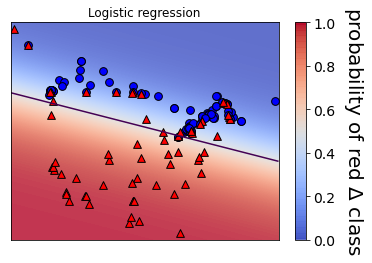

In [ ]:
plot_classifier(X_train, y_train, lr, proba=True, ax=plt.gca())
plt.title("Logistic regression");

**Model Evaluation**

We don't always evaluate a model based on accuracy.

A confusion matrix is a table that allows us evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [ ]:
from sklearn import metrics

y_pred=lr.predict(X_test.values)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[28,  0],
       [ 7,  7]], dtype=int64)

In [ ]:
TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_pred).ravel()

**Accuracy:** Proportion of correct predictions (both true positives and true negatives) among the total number of cases examined.

In [ ]:
accuracy = (TP+TN)/(TN+FP+FN+TP)
accuracy

0.8333333333333334

**Precision:** Fraction of predicted positives that are actually positive.

In [ ]:
precision = TP/(TP+FP) 
precision

1.0

**Recall:** Fraction of true positives that are predicted positive

In [ ]:
recall = TP/(TP+FN)
recall

0.5

### Interpretability of linear classifiers


- One of the primary advantage of linear classifiers is their ability to interpret models. 
- The model has a learned coefficient for each feature. 
- In linear models, the $j^{th}$ coefficient tells us how feature $j$ affects the prediction. 
- So looking at the features which have coefficients with larger magnitudes might be useful.

#### Limitations of linear classifiers 

- Is your data "linearly separable"? Can you draw a hyperplane between these datapoints that separates them with 0 error. 
    - If the training examples can be separated by a linear decision rule, they are **linearly separable**.
    
- Do not worry! You will learn a lot of models that will be able do deal with not linearly separable data.

# In Class Project: Churn Prediction using Logistic Regression

We want to create a model to predict if customers will churn from using ABC Multinational Bank based on their credit score, age, tenure, bank balance and estimated salary  

In [ ]:
#Load Data
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Split Data into Train/Test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

X_train, y_train = train_df[['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']], train_df["churn"]
X_test, y_test = test_df[['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']], test_df["churn"]

In [ ]:
#Load Model
lr = LogisticRegression()

In [ ]:
#Fit Model
lr.fit(X_train.values, y_train)

LogisticRegression()

In [ ]:
# Put Data Point, Model Prediction and Probability in Dataframe
data_dict = {"y":y_train, 
             "predicted y": lr.predict(X_train.values).tolist(),
             "probabilities": lr.predict_proba(X_train.values).tolist()}

pd.DataFrame(data_dict)

,y,predicted y,probabilities
9216,0,0,"[0.9202456437848812, 0.0797543562151188]"
7324,1,0,"[0.8288007561894771, 0.17119924381052287]"
918,0,0,"[0.9280104531439076, 0.0719895468560924]"
5902,0,0,"[0.862824776505568, 0.13717522349443204]"
2807,0,0,"[0.8497295829089593, 0.15027041709104078]"
...,...,...,...
9785,0,0,"[0.6526013969477986, 0.3473986030522014]"
7763,0,0,"[0.813073442831682, 0.186926557168318]"
5218,0,0,"[0.9041376168717148, 0.09586238312828525]"
1346,0,0,"[0.8606897228341801, 0.13931027716581995]"


In [ ]:
#Check Train Score
lr.score(X_train, y_train)

0.79175

In [ ]:
#Check Test Score
lr.score(X_test, y_test)

0.783

### Multinomial Logistic Regression

- So far we have been talking about binary classification 
- What if there are more than two classes? 
    - ["ImageNet" computer vision competition](http://www.image-net.org/challenges/LSVRC/), for example, has 1000 classes 
- Can we use logistic regression for that?

Let's create some synthetic data with two features and three classes. 

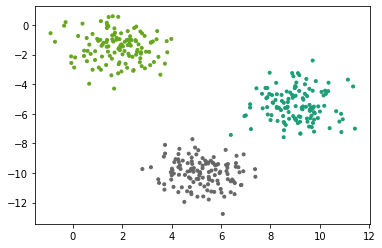

In [ ]:
from sklearn.datasets import make_blobs

# generate blobs with fixed random generator
X, y = make_blobs(n_samples=500, centers=3, random_state=200)
X_train, X_test, y_train, y_test = train_test_split(X, y)
plt.scatter(*X_train.T, c=y_train, marker=".", cmap="Dark2");

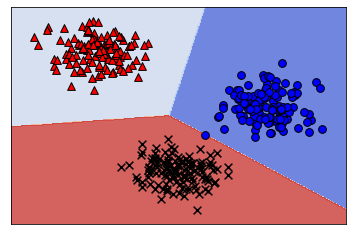

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
plot_classifier(X_train, y_train, lr);

In [ ]:
print("LR classes: ", lr.classes_)
print("Predict proba: ", lr.predict_proba([X_test[0]]))

LR classes:  [0 1 2]
Predict proba:  [[6.70566398e-03 9.93278246e-01 1.60897652e-05]]


### Multi-class strategies

- Two common strategies
    - One-vs-rest
    - One-vs-one

By default LogisticRegression uses one-vs-rest strategy to deal with multi-class

### One-vs-rest scheme

- Uses "one-vs-rest" scheme (also known as one-vs-all)
  - turns $k$-class classification into $k$ binary classification problems
  - builds $k$ binary classifiers; for each classifier, the class is fitted against all the other classes
  - each one gives a probability of that class assuming it to be "positive" using the sigmoid function
  - normalize these values across all the classes
  - the class with the maximum value is the prediction 
  - you can do this yourself for any binary classifier using the meta-classifier [`OneVsRestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html)

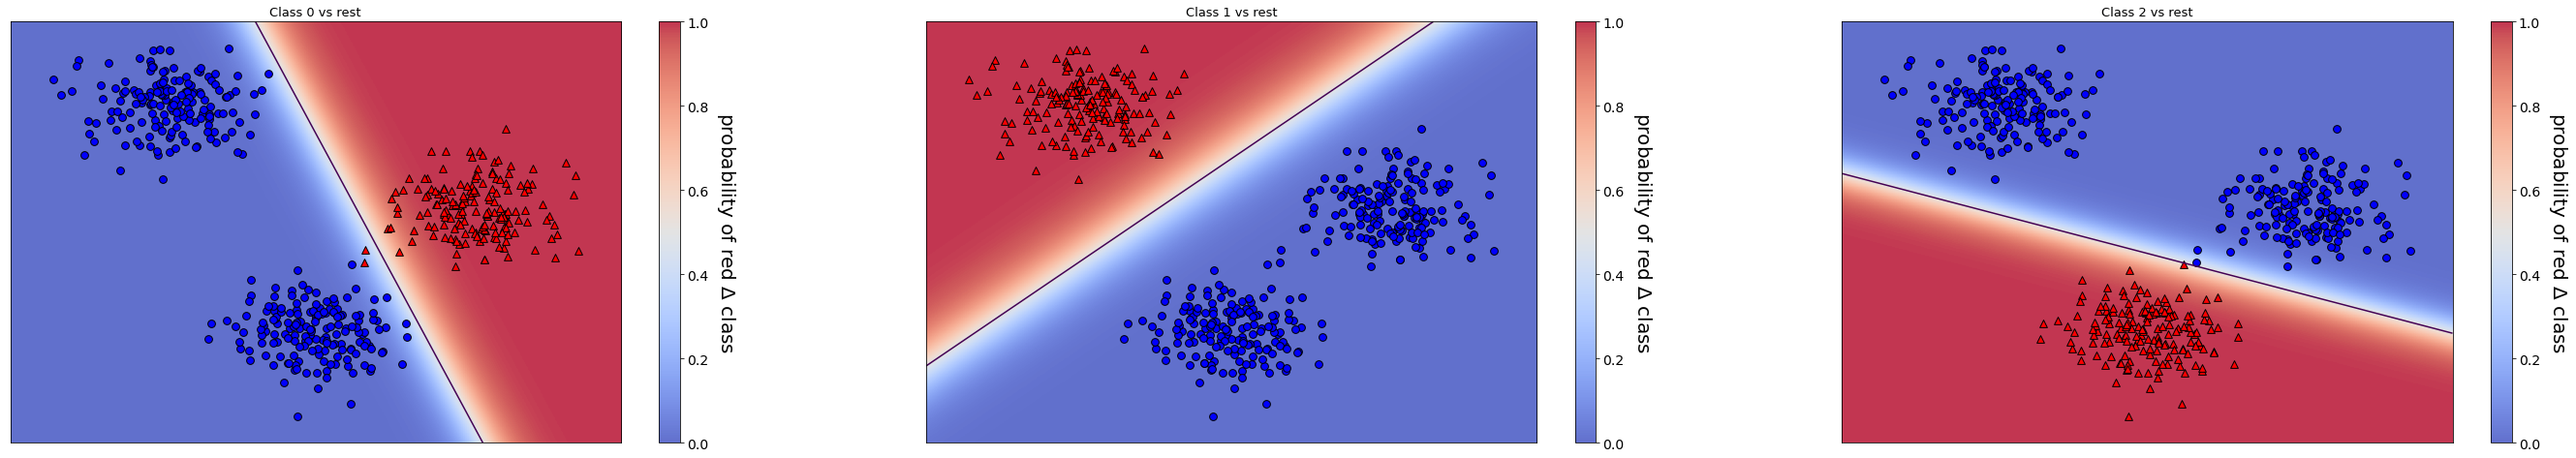

In [ ]:
# Here's how one-vs-rest works:
def one_vs_rest_plots(model_class, X, y):
    plt.figure(figsize=(48, 8))
    classes = np.unique(y)
    k = len(classes)
    for i, c in enumerate(classes):
        plt.subplot(1, k, i + 1)

        y_binary = y == c
        model = model_class()
        model.fit(X, y_binary)
        plot_classifier(X, y_binary, model, ax=plt.gca(), proba=True)
        plt.title("Class %d vs rest" % c, fontsize=13)


one_vs_rest_plots(LogisticRegression, X, y)

## Summary

- Logistic regression is a linear classifier; it has one coefficient per feature, plus an intercept. 
- We combine our features and coefficients with a dot product, that is $w_0 + w_1x_1 + w_2x_2 + \ldots + w_dx_d$.
- The decision boundary is a hyperplane dividing the feature space in half.
- You can think of the coefficients as controlling the orientation/tilt of the hyperplane and the bias representing the intercept (offset from the origin). 

**Under the hood**

**Odds** describes the ratio of success to ratio of failure.



Things to consider on how Logistic Regression works. Do not lose sleep over these. 

### Odds

The **probability** that an event will occur is the fraction of times you expect to see that event in many trials. 
Probabilities always range between 0 and 1. 

The **odds** are defined as the probability that the event will occur divided by the probability that the event will not occur.  
$\frac{y}{(1-y)}$

* If a race horse runs 100 races and wins 25 times and loses the other 75 times, the probability of winning is 25/100 = 0.25 or 25%. The odds of the horse winning are 25/75 = 0.333 or 1 win to 3 loses.

* If the horse runs 100 races and wins 5 and loses the other 95 times, the probability of winning is 0.05 or 5%, and the odds of the horse winning are 5/95 = 0.0526.

* If the horse runs 100 races and wins 50, the probability of winning is 50/100 = 0.50 or 50%, and the odds of winning are 50/50 = 1 (even odds).

* If the horse runs 100 races and wins 80, the probability of winning is 80/100 = 0.80 or 80%, and the odds of winning are 80/20 = 4 to 1.

What would happen if the horse is too bad at racing? What would happen if the horse is the best? 

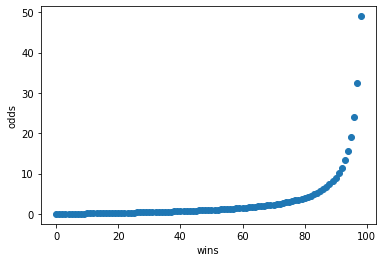

In [ ]:
races = 100
wins = range(99)

odds = [wins[i] / (races - wins[i]) for i in wins]

plt.scatter(wins, odds)
plt.xlabel("wins")
plt.ylabel("odds")
plt.show()

If the horse is too bad, the odds of winning will tend to zero.

But if the horse is too good, the odds of winning will be too high.... they can reach infinity... 

How can we compare?

**Log Odds**  
So now that we understand Odds and Probability, we can understand Log Odds. 

Log of Odds is nothing but log(odds). Log Odds makes the magnitude of odds against look so much smaller to those in favor.

When we take a log of odds, we make it look symmetrical.

$Logit Function = log\frac{p}{1-p}$

Odds of winning = 4/6 = 0.6666  
log(Odds of winning) = log(0.6666) = -0.176  
Odds of losing = 6/4 = 1.5  
log(Odds of losing) = log(1.5) = 0.176  

C:\Users\MCASSAR\.conda\envs\DAB300a\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


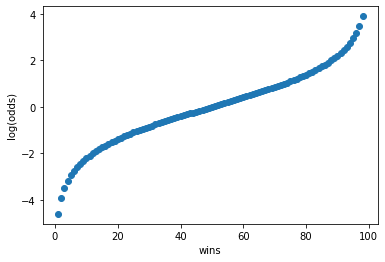

In [ ]:
plt.scatter(wins, np.log(odds))
plt.xlabel("wins")
plt.ylabel("log(odds)")
plt.show()

The value of the logit function heads towards infinity as p approaches 1 and towards negative infinity as it approaches 0.

The logit function is useful in analytics because it maps probabilities (which are values in the range [0, 1]) to the full range of real numbers. In particular, if you are working with “yes-no” (binary) inputs it can be useful to transform them into real-valued quantities prior to modeling. This is essentially what happens in logistic regression.

The inverse of the logit function is the sigmoid function. That is, if you have a probability p, sigmoid(logit(p)) = p. The sigmoid function maps arbitrary real values back to the range [0, 1]. 

The larger the value, the closer to 1 you’ll get.

# **Take Home:** 
Try creating a Multinomial Logistic Regression on the Iris Data Set to predict all Species of the flower!